In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
mpl.rcParams['image.cmap'] = 'gray'

In [2]:
# Read the image
img = cv2.imread(r"C:\Users\Bharath\Downloads\hari\img_4.jpg", 0)

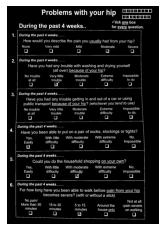

In [4]:
 # Thresholding the image
(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY|     cv2.THRESH_OTSU)
# Invert the image
img_bin = 255-img_bin 
cv2.imwrite("Images/Image_bin.jpg",img_bin)
plt.axis('off')
plt.imshow(img_bin);

In [5]:
def f(x):
    # Defining a kernel length
    global horizontal_lines_img, verticle_lines_img, kernel
    kernel_length = np.array(img).shape[1]//x

    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # Morphological operation to detect vertical lines from an image
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    cv2.imwrite("Images/verticle_lines.jpg",verticle_lines_img)
    # Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
    plt.subplot(1, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
    plt.imshow(verticle_lines_img);
    plt.axis('off')

    plt.subplot(1, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
    plt.imshow(horizontal_lines_img);
    plt.axis('off')

#interact(f,  x=widgets.IntSlider(min=1,max=255,step=1,value=50));
interact(f,  x=255);


interactive(children=(IntSlider(value=255, description='x', max=765, min=-255), Output()), _dom_classes=('widg…

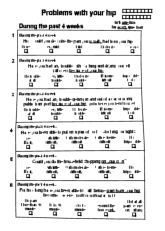

In [6]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(img_final_bin)

In [7]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

# Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort all the contours by top to bottom.
(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")

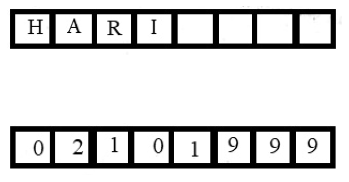

In [8]:
idx = 0
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
    if (w > 80 and h > 20) and w > 3*h:
        idx += 1
        new_img = img[y:y+h, x:x+w]
        try:
            plt.subplot(2,1, idx)
            plt.imshow(new_img)
            plt.savefig('foo.jpeg')
            plt.axis('off')
        except:
            ValueError

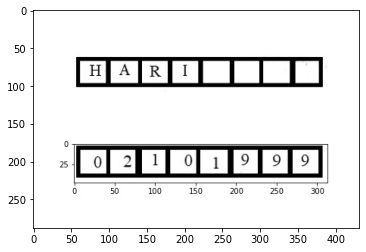

In [9]:
img1=cv2.imread("foo.jpeg")
plt.imshow(img1)

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Read the image
img = cv2.imread(r"C:\Users\Bharath\Downloads\hari\img_4.jpg", 0)

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

In [ ]:
pip install boxdetect

In [ ]:
from boxdetect import config
cfg = config.PipelinesConfig()

In [ ]:
# important to adjust these values to match the size of boxes on your image
cfg.width_range = (23,50)
cfg.height_range = (23,50)

In [ ]:
# the more scaling factors the more accurate the results but also it takes more time to processing
# too small scaling factor may cause false positives
# too big scaling factor will take a lot of processing time
cfg.scaling_factors = [4.0]

In [ ]:
# w/h ratio range for boxes/rectangles filtering
cfg.wh_ratio_range = (0.5, 1.7)

In [ ]:
# group_size_range starting from 2 will skip all the groups
# with a single box detected inside (like checkboxes)
cfg.group_size_range = (1,4)

In [ ]:
# num of iterations when running dilation tranformation (to engance the image)
cfg.dilation_iterations = 0

In [ ]:
from boxdetect.pipelines import get_boxes

In [ ]:
rects, grouping_rects, image, output_image = get_boxes(img, cfg=cfg, plot=False)

In [ ]:
print(grouping_rects)

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(output_image)
plt.show()

In [ ]:
cfg.group_size_range = (1, 1)

In [ ]:
from boxdetect.pipelines import get_checkboxes

checkboxes = get_checkboxes(img, cfg=cfg, px_threshold=0.1, plot=False, verbose=True)

In [ ]:
print("Output object type: ", type(checkboxes))
for checkbox in checkboxes:
    print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
    print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
    print("Display the cropout of checkbox:")
    plt.figure(figsize=(1,1))
    plt.imshow(checkbox[2])
    plt.show()

In [ ]:
i=0
x=0
for checkbox in checkboxes:
    i=i+1
    if(str(checkbox[1])=="True"):
        x=x+1
        if(i%5==0):
        print(x,5)
        else:
        print(x,(i%5))